In [1]:
import requests 
import pandas as pd
import numpy as np
import sys; sys.path
import datetime
import pandas as pd
import numpy as np 
from datetime import datetime
from datetime import datetime
from tqdm import tqdm
import random
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

from bitcoin_deep_learning.call_api import ApiCall
from bitcoin_deep_learning.model import LinearRegressionBaselineModel, RnnDlModel,RandomForestReg
from bitcoin_deep_learning.trainer import train, read_result
from bitcoin_deep_learning.cross_val import cross_val, get_cross_XY
api = ApiCall()

%load_ext autoreload
%autoreload 2

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
#df = ApiCall().get_clean_data()
#ApiCall().data_to_csv(df)
#ApiCall().save_train_val_test_split(df)


In [4]:
train_df = ApiCall().read_local()
print((9014.026207-8222.753649)/9014.026207)
print((8799.121911-8677.910527)/8799.121911)
train_df.head(20)


0.08778236714971208
0.013775395457184293


,date,[AVG]_[NH]_mean_hash_rate,[+]_[NH]_Days_Till_Halving,[//]_[AV]_Stock-to-Flow_Ratio,[+]_[NH]_Circulating_Supply,[+]_[NH]_Issuance,[+]_[NH]_Number_of_Active_Addresses,[+]_[NH]_Mean_Block_Interval,[+]_[NH]_Number_of_Transactions,[+]_[NH]_Number_of_Addresses_with_a_Non-Zero_Balance,...,[//]_[AV]_Realized_Profits-to-Value_(RPV)_Ratio,fear_greed_value,[+]_[NH]_Number_of_Addresses_with_Balance_0.01 - 0.1,[+]_[NH]_Number_of_Addresses_with_Balance_0.1 - 1,[+]_[NH]_Number_of_Addresses_with_Balance_1 - 10,[+]_[NH]_Number_of_Addresses_with_Balance_10 - 100,[+]_[NH]_Number_of_Addresses_with_Balance_100 - 1k,[+]_[NH]_Number_of_Addresses_with_Balance_1k - 10k,[+]_[T]_Bitcoin_Price,[%]_Bitcoin_growth_rate_on_Horizon=1
0,2018-02-01,2.054109e+19,830,5642.903220,16839700.0,2000.0,842398,377,257504,27026398,...,0.003691,30,4226306,1722331,544769,132314,15779,1529,9014.026207,-0.119114
1,2018-02-02,2.170824e+19,829,5641.695528,16841800.0,2100.0,854253,385,235750,26955617,...,0.002557,15,4198274,1704275,543489,132213,15815,1521,8799.121911,-0.024423
2,2018-02-03,2.073919e+19,828,5641.015128,16843775.0,1975.0,714655,384,194733,26886977,...,0.001970,40,4173275,1692828,542447,132021,15812,1523,9208.459919,0.044452
3,2018-02-04,2.280248e+19,827,5632.191528,16846000.0,2225.0,720904,349,173509,26753036,...,0.005174,24,4103680,1674480,540698,132009,15830,1532,8176.460616,-0.126216
4,2018-02-05,2.411984e+19,826,5626.186626,16848312.5,2312.5,903239,338,216178,26562089,...,0.003859,11,4036425,1668996,541030,131987,15813,1519,6891.934414,-0.186381
5,2018-02-06,2.199977e+19,825,5613.582892,16850437.5,2125.0,999110,358,243950,26426352,...,0.004790,8,4034268,1663664,537892,131953,15822,1525,7714.392057,0.106613
6,2018-02-07,2.004877e+19,824,5619.041374,16852200.0,1762.5,814500,453,213578,26340551,...,0.002964,36,4024022,1659967,538766,131816,15782,1521,7575.611197,-0.018319
7,2018-02-08,1.876627e+19,823,5626.039833,16853837.5,1637.5,746341,435,173158,26217915,...,0.003914,30,4010185,1662072,539783,131822,15806,1527,8222.753649,0.078701
8,2018-02-09,1.919364e+19,822,5639.520131,16855525.0,1687.5,775346,483,177725,26145417,...,0.001574,44,4006306,1666049,540436,131315,15745,1529,8677.910527,0.052450
9,2018-02-10,2.043647e+19,821,5643.008314,16857312.5,1787.5,741833,426,181640,26044328,...,0.002241,54,3992860,1670898,539736,131438,15733,1533,8537.393208,-0.016459


In [5]:
model = LinearRegressionBaselineModel()
val_score, score = train(model,train_df)
np.array(val_score).argmax()

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:06<00:00,  5.09it/s]


Training done


3

0.02661

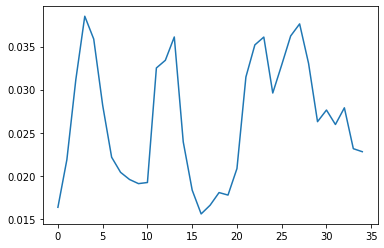

In [6]:
plt.plot(val_score)
score



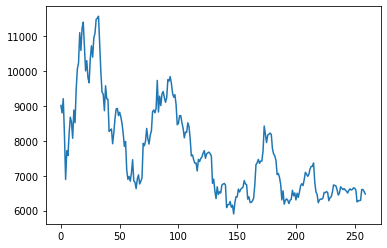

In [7]:
import matplotlib.pyplot as plt
plt.plot(train_df["[+]_[T]_Bitcoin_Price"].iloc[0:260])

In [8]:
(X_train_list, Y_train_list, X_test_list,Y_test_list) = get_cross_XY(data="train")


In [9]:
model = LinearRegressionBaselineModel(alpha=5,l1_ratio=0.01)
#model = LinearRegressionBaselineModel(alpha=50,l1_ratio=0.01)
fold_score,score = train(model,train_df)


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:06<00:00,  5.41it/s]


Training done


In [11]:
df = read_result()
df.sort_values(by="mean_score",ascending=True)

,name,fold_score,mean_score,min_score,max_score,hyperparams,date
3,LinearReg,"[0.00812, 0.01203, 0.01401, 0.01656, 0.01222, ...",1.254000e-02,0.00289,3.895000e-02,"{'alpha': 5, 'l1_ratio': 0.01}",08-03 10:12:03
4,LinearReg,"[0.00812, 0.01203, 0.01401, 0.01656, 0.01222, ...",1.254000e-02,0.00289,3.895000e-02,"{'alpha': 50, 'l1_ratio': 0.01}",08-03 10:12:18
2,LinearReg,"[0.00812, 0.01182, 0.01348, 0.01578, 0.01279, ...",1.292000e-02,0.00362,3.897000e-02,"{'alpha': 0.5, 'l1_ratio': 0.01}",08-03 10:11:37
118,LinearReg,"[0.01584, 0.02101, 0.02833, 0.03818, 0.03577, ...",2.658000e-02,0.01580,3.838000e-02,"{'alpha': 1, 'l1_ratio': 0.5}",08-03 13:04:27
16,LinearReg,"[0.01584, 0.02101, 0.02833, 0.03818, 0.03577, ...",2.658000e-02,0.01580,3.838000e-02,"{'alpha': 1, 'l1_ratio': 0.5}",08-03 12:09:53
...,...,...,...,...,...,...,...
7,LinearReg,"[915.67801, 678.65981, 255.00254, 120.67099, 1...",2.312336e+02,100.42368,9.156780e+02,"{'alpha': 1, 'l1_ratio': 0.001}",08-03 11:05:35
6,LinearReg,"[1308.83024, 1665.7354, 1120.5456, 122.59755, ...",5.218495e+02,101.00232,1.742943e+03,"{'alpha': 0.1, 'l1_ratio': 0.001}",08-03 11:04:46
8,LinearReg,"[1308.83024, 1665.7354, 1120.5456, 122.59755, ...",5.218495e+02,101.00232,1.742943e+03,"{'alpha': 0.1, 'l1_ratio': 0.001}",08-03 11:20:15
1,ClassicLinearReg,"[0.07596, 0.15033, 0.40177, 0.76549, 0.14513, ...",8.748385e+24,0.05000,1.856245e+26,None,08-03 09:50:46


FOLD  0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:23<00:00,  1.47it/s]


Training done
Average mae is  0.19964718144987192


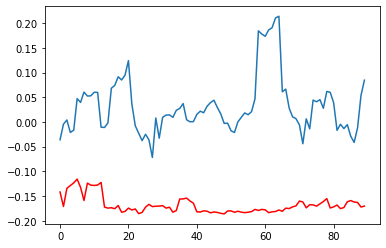

FOLD  1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:25<00:00,  1.39it/s]


Training done
Average mae is  0.07461102647609169


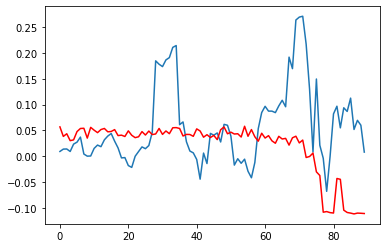

FOLD  2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:23<00:00,  1.48it/s]


Training done
Average mae is  0.12237597327046462


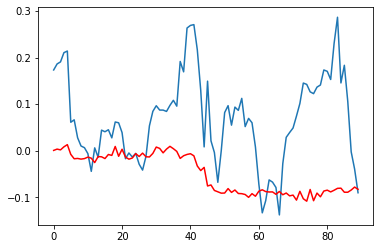

FOLD  3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:25<00:00,  1.39it/s]


Training done
Average mae is  0.1591757813744751


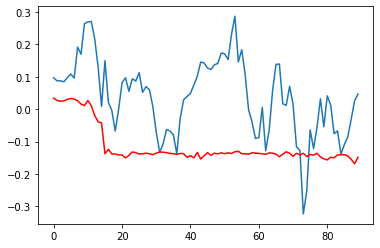

FOLD  4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:23<00:00,  1.48it/s]


Training done
Average mae is  0.1105654891118079


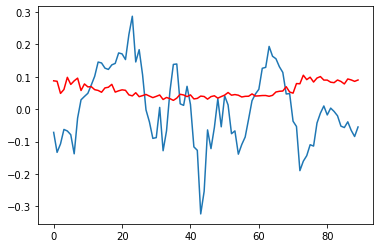

FOLD  5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:25<00:00,  1.39it/s]


Training done
Average mae is  0.16144118503374955


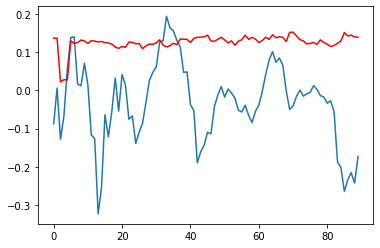

FOLD  6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:25<00:00,  1.39it/s]


Training done
Average mae is  0.10959113587577662


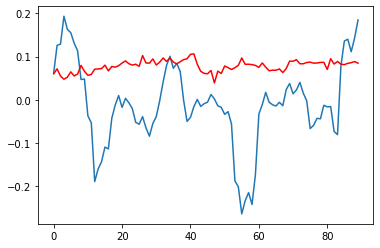

FOLD  7


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:28<00:00,  1.24it/s]


Training done
Average mae is  0.07656483629384597


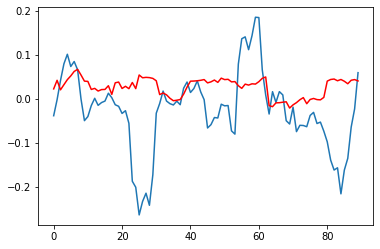

FOLD  8


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:22<00:00,  1.53it/s]


Training done
Average mae is  0.05809507797054805


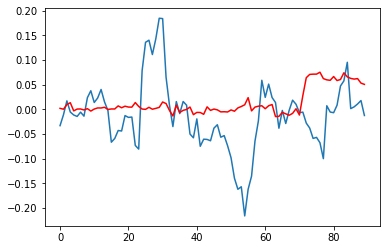

FOLD  9


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:22<00:00,  1.55it/s]


Training done
Average mae is  0.05859748315483817


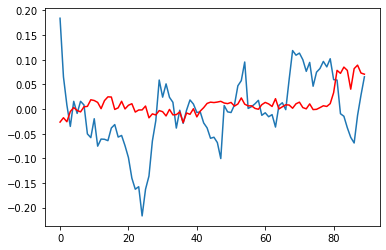

FOLD  10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:22<00:00,  1.55it/s]


Training done
Average mae is  0.048728204011195604


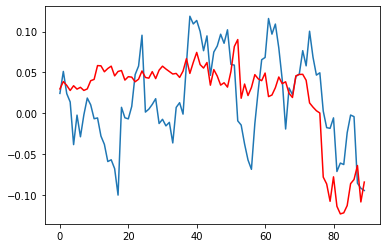

FOLD  11


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:22<00:00,  1.57it/s]


Training done
Average mae is  0.11086240818075802


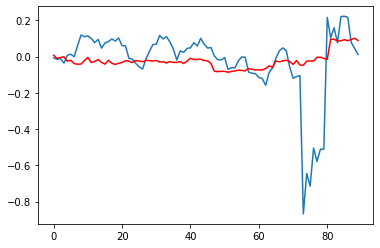

FOLD  12


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:22<00:00,  1.56it/s]


Training done
Average mae is  0.09870445750756182


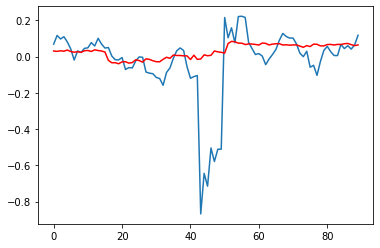

FOLD  13


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:24<00:00,  1.46it/s]


Training done
Average mae is  0.10412652189371518


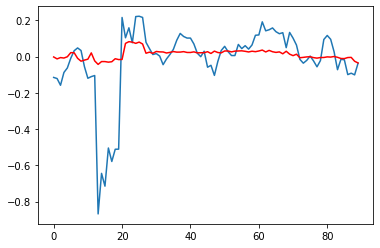

FOLD  14


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:27<00:00,  1.29it/s]


Training done
Average mae is  0.3252655897381202


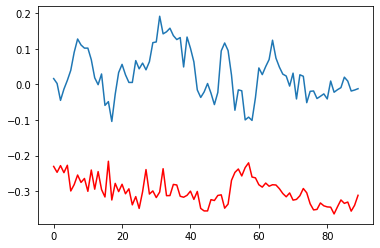

FOLD  15


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:22<00:00,  1.58it/s]


Training done
Average mae is  0.24662585405301823


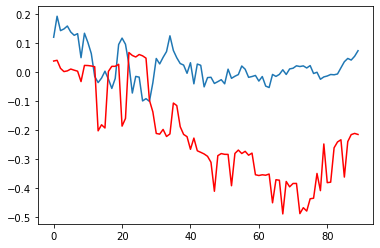

FOLD  16


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:22<00:00,  1.57it/s]


Training done
Average mae is  0.3506518015399297


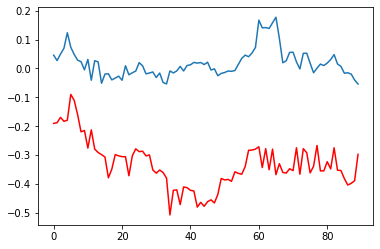

FOLD  17


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:22<00:00,  1.57it/s]


Training done
Average mae is  0.31983824346734774


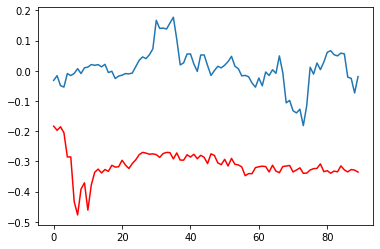

FOLD  18


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:22<00:00,  1.57it/s]


Training done
Average mae is  0.06403957687961082


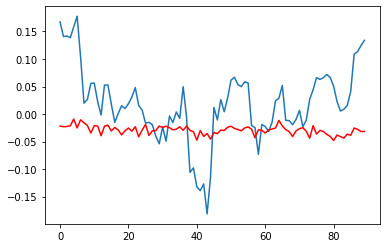

FOLD  19


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:25<00:00,  1.38it/s]


Training done
Average mae is  0.06154094760587964


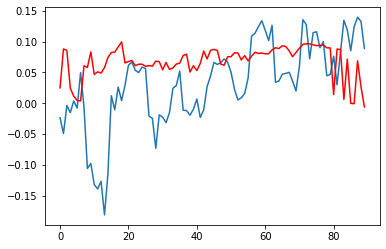

FOLD  20


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:24<00:00,  1.44it/s]


Training done
Average mae is  0.11989310264226953


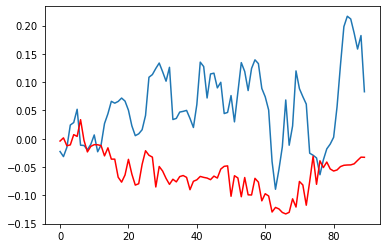

FOLD  21


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:24<00:00,  1.41it/s]


Training done
Average mae is  0.13504740750609323


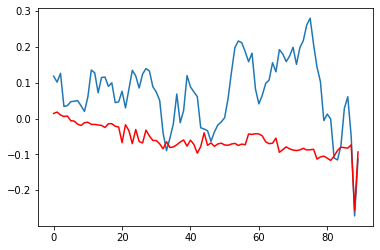

FOLD  22


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:24<00:00,  1.41it/s]


Training done
Average mae is  0.13367991077948752


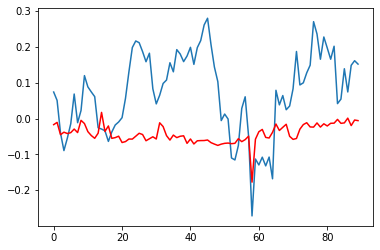

FOLD  23


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:25<00:00,  1.38it/s]


Training done
Average mae is  0.10984882188776866


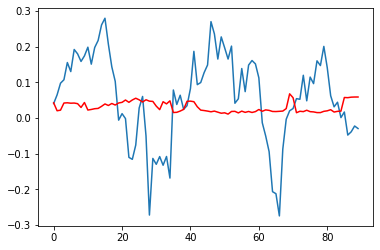

FOLD  24


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:22<00:00,  1.57it/s]


Training done
Average mae is  0.10243894821508935


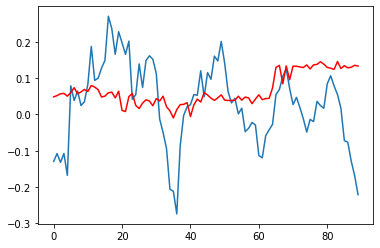

FOLD  25


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:22<00:00,  1.56it/s]


Training done
Average mae is  0.17196795115308428


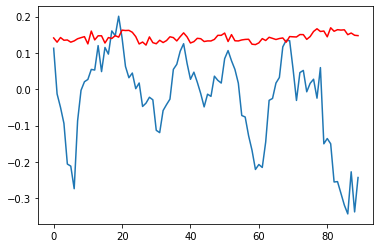

FOLD  26


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:22<00:00,  1.53it/s]


Training done
Average mae is  0.15507698575952658


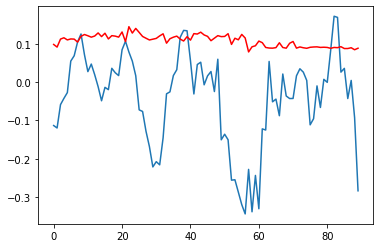

FOLD  27


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:23<00:00,  1.50it/s]


Training done
Average mae is  0.13033136458765063


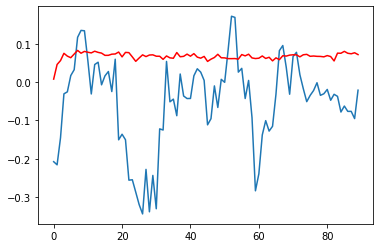

FOLD  28


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:22<00:00,  1.53it/s]


Training done
Average mae is  0.07926625732236268


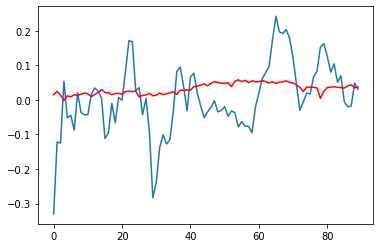

FOLD  29


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:25<00:00,  1.35it/s]


Training done
Average mae is  0.09970423855917829


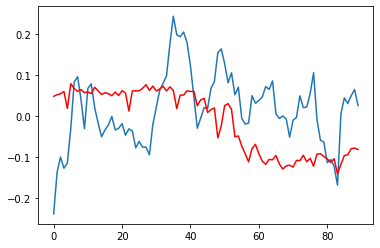

FOLD  30


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:24<00:00,  1.45it/s]


Training done
Average mae is  0.1648925715754746


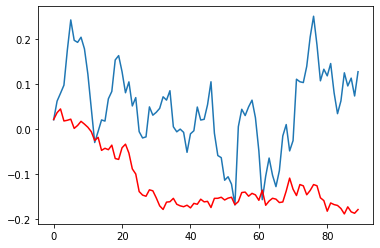

FOLD  31


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:28<00:00,  1.25it/s]


Training done
Average mae is  0.16052049093012866


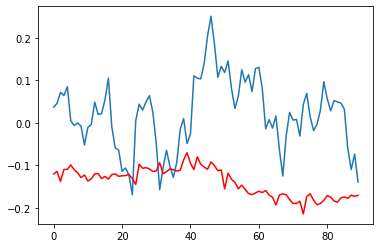

In [35]:
#index = np.array(fold_score).argmax()
#model = LinearRegressionBaselineModel(alpha=0.1,l1_ratio=0.001)
#model = LinearRegressionBaselineModel(alpha=50,l1_ratio=0.01)
from bitcoin_deep_learning.model import RandomForestReg
model = RandomForestReg()
#model = LinearRegressionBaselineModel(alpha=0.1,l1_ratio=0.001)
(X_train_list, Y_train_list, X_test_list,Y_test_list) = get_cross_XY(data="train")
scores = []
for index in range(len(X_train_list)):
    print("FOLD ",index)
    model.set_model()
    fold_score,score = train(model,train_df)
    X_test = X_test_list[index]
    X_train = X_train_list[index]
    Y_test = Y_test_list[index]
    Y_train = Y_train_list[index]
    Y_pred = model.run(X_test,X_train,Y_train)
    score = mean_absolute_error(Y_pred,Y_test)
    print("Average mae is ",score)
    scores.append(score)
    plt.plot(Y_test)
    plt.plot(Y_pred,color="r")
    plt.show()
    Y_pred.mean()


FOLD  0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:23<00:00,  1.51it/s]


Training done
Average mae is  0.18522782755984016


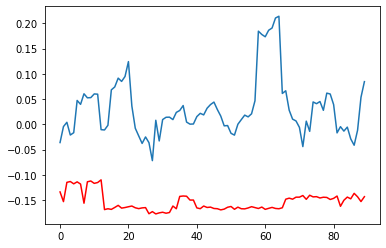

0.03141837408165089 0.05833763423717097
-0.1538094534781892 0.017449991179013812
FOLD  1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:23<00:00,  1.52it/s]


Training done
Average mae is  0.0746261676481278


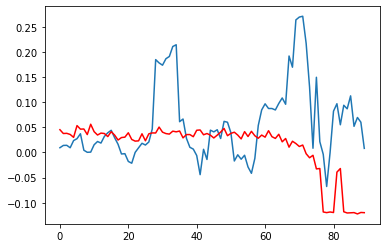

0.057766867308514026 0.07482422017680358
0.01145446924182483 0.051920730061926476
FOLD  2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:23<00:00,  1.50it/s]


Training done
Average mae is  0.12307410438274019


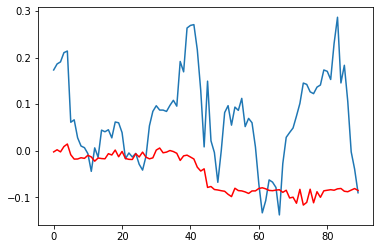

0.06838128974075469 0.09413492747902683
-0.04972075245326723 0.040053921324859944
FOLD  3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:23<00:00,  1.50it/s]


Training done
Average mae is  0.1569581247941643


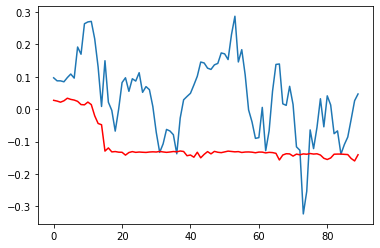

0.0381648449008278 0.11597837977774177
-0.11193044067033386 0.05636977972380409
FOLD  4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:24<00:00,  1.41it/s]


Training done
Average mae is  0.11086233002931242


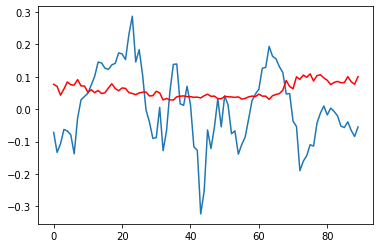

0.004028990925852103 0.11265676604796739
0.05856913739239443 0.022653935536393825
FOLD  5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:25<00:00,  1.37it/s]


Training done
Average mae is  0.1588429916343444


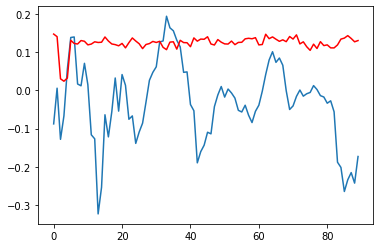

-0.03072436725089022 0.1026058410400775
0.12275381866538648 0.01979708827305712
FOLD  6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:24<00:00,  1.40it/s]


Training done
Average mae is  0.09873430584492705


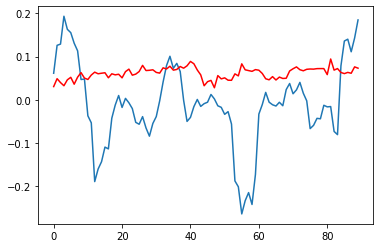

-0.01128564993953594 0.09480219488906606
0.06122426508839935 0.013047520761181125
FOLD  7


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:22<00:00,  1.55it/s]


Training done
Average mae is  0.08419707734707078


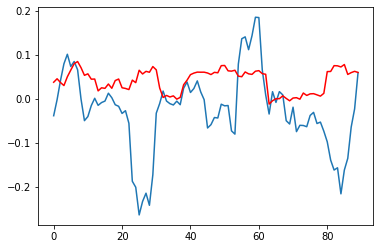

-0.026968513995554576 0.08928991890304047
0.040333925192881044 0.025976094089219588
FOLD  8


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:22<00:00,  1.56it/s]


Training done
Average mae is  0.059059787660296764


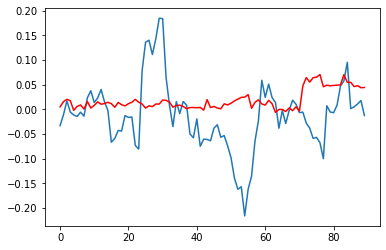

-0.012285299799788376 0.06934506674611199
0.0185096817835874 0.019773590965017854
FOLD  9


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:22<00:00,  1.54it/s]


Training done
Average mae is  0.061929627892674324


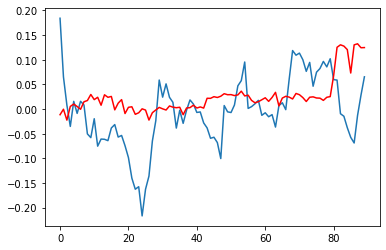

-0.004864254761979907 0.06950738701304475
0.024646807342751053 0.03548830016959511
FOLD  10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:22<00:00,  1.55it/s]


Training done
Average mae is  0.044006758226248575


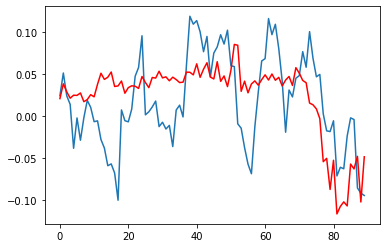

0.017276258691950323 0.055093885934180166
0.023391897615092205 0.04436592632234733
FOLD  11


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:22<00:00,  1.56it/s]


Training done
Average mae is  0.11328660209834822


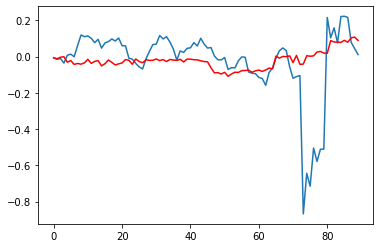

-0.024444772303502744 0.1926707074548759
-0.02152237117408343 0.04732135979360314
FOLD  12


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:22<00:00,  1.56it/s]


Training done
Average mae is  0.10026903331112058


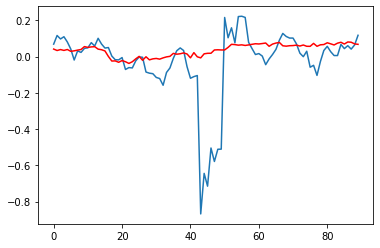

-0.026484090230683145 0.19199956993537323
0.03562049824047396 0.03348510331010078
FOLD  13


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:22<00:00,  1.57it/s]


Training done
Average mae is  0.10694478692322071


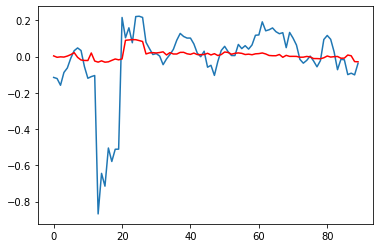

-0.01853691985343119 0.19738687973493754
0.008931062676904683 0.026098841031172413
FOLD  14


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:24<00:00,  1.40it/s]


Training done
Average mae is  0.31769079596348726


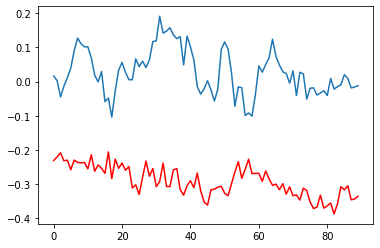

0.026625273968814738 0.06516863099761049
-0.2910655219946725 0.04422256310625259
FOLD  15


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:22<00:00,  1.55it/s]


Training done
Average mae is  0.2664288396413512


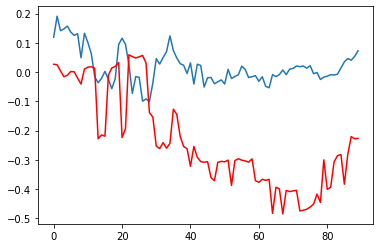

0.017386332798059047 0.05996522367226902
-0.23285851250304002 0.16569919008739856
FOLD  16


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:22<00:00,  1.56it/s]


Training done
Average mae is  0.3415763462597494


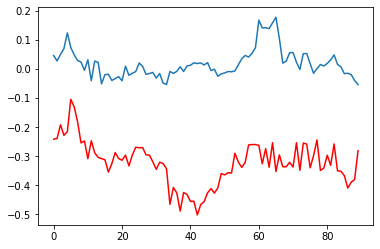

0.01850870729946045 0.049501291252706685
-0.323067638960289 0.07441964492614929
FOLD  17


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:22<00:00,  1.53it/s]


Training done
Average mae is  0.33214547392216903


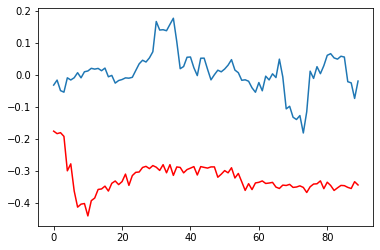

0.008251653930483835 0.06239211647469993
-0.3238938199916852 0.0446513509462027
FOLD  18


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:23<00:00,  1.51it/s]


Training done
Average mae is  0.0643711026738672


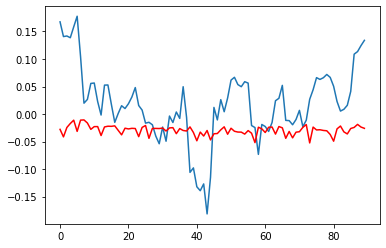

0.01800278793120236 0.06656589767144858
-0.029476841536314167 0.008418877284047313
FOLD  19


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:22<00:00,  1.56it/s]


Training done
Average mae is  0.06867377515962535


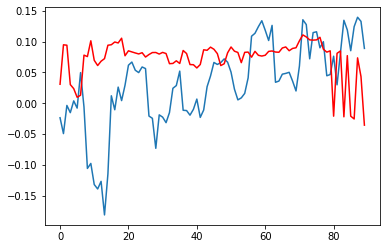

0.03155306264649449 0.06809367620734243
0.07288238851358904 0.030150890033627635
FOLD  20


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:22<00:00,  1.56it/s]


Training done
Average mae is  0.11565234109334058


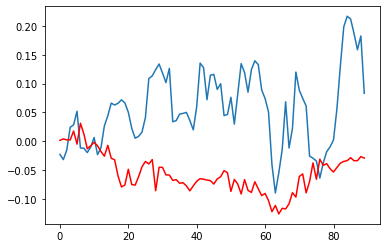

0.056441602289500126 0.06528666848291209
-0.054712220400830396 0.03343187772586139
FOLD  21


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:25<00:00,  1.35it/s]


Training done
Average mae is  0.13071786168026842


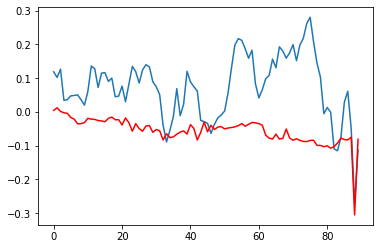

0.07245292974094839 0.09374360470265686
-0.055824825332549004 0.038192866770851375
FOLD  22


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:23<00:00,  1.52it/s]


Training done
Average mae is  0.14195814143045707


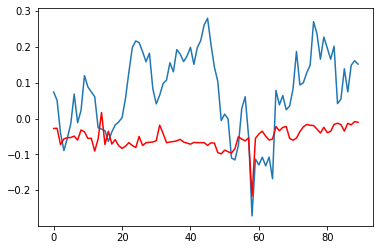

0.07285758738638848 0.11269919297712777
-0.053730332143296915 0.029212165367806592
FOLD  23


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:24<00:00,  1.40it/s]


Training done
Average mae is  0.10929979989614319


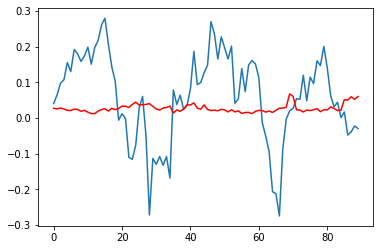

0.05976582163321487 0.12213664485159495
0.027481626395386014 0.011294459170138157
FOLD  24


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:25<00:00,  1.40it/s]


Training done
Average mae is  0.1084461064507352


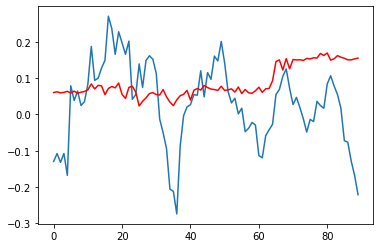

0.030769882841245492 0.11076570537485668
0.08767822548157743 0.04189811919660303
FOLD  25


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:23<00:00,  1.50it/s]


Training done
Average mae is  0.1762105064288198


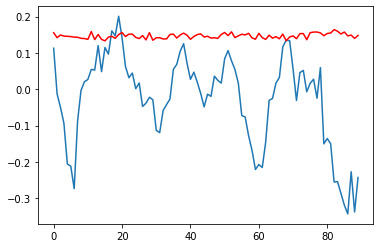

-0.027828624749078053 0.12488658731598505
0.1467488348725683 0.006987953229821379
FOLD  26


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:24<00:00,  1.43it/s]


Training done
Average mae is  0.14806050917701544


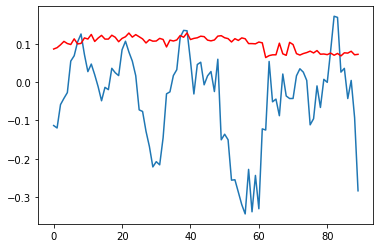

-0.042411077998517566 0.12001063299162239
0.09996060252193592 0.018219465258649724
FOLD  27


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:24<00:00,  1.45it/s]


Training done
Average mae is  0.1295138349525413


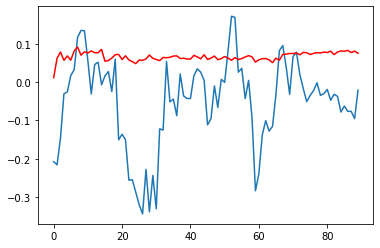

-0.05301919507585173 0.11450714738127156
0.06683412876791987 0.010786932061552477
FOLD  28


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:22<00:00,  1.55it/s]


Training done
Average mae is  0.07922906863823485


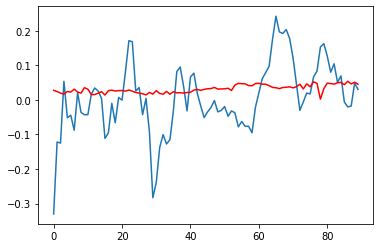

0.005354047262717871 0.10088496486908717
0.031872353067065075 0.011345676426847974
FOLD  29


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:22<00:00,  1.57it/s]


Training done
Average mae is  0.08868331564153262


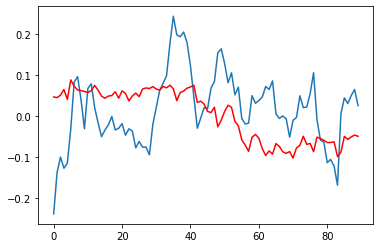

0.016223133145462705 0.08659155590347324
0.0014221195636826417 0.06159234250365201
FOLD  30


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:24<00:00,  1.41it/s]


Training done
Average mae is  0.15989140695210283


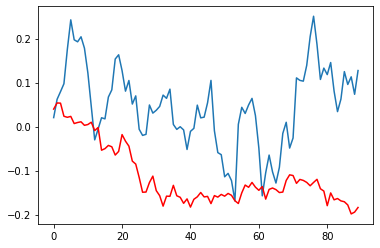

0.04590592324064037 0.08998856578451411
-0.11253091514245873 0.06734990281259054
FOLD  31


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:35<00:00,  1.02s/it]


Training done
Average mae is  0.1554677645555789


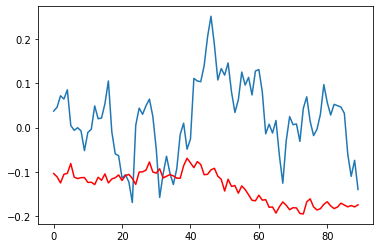

0.018737589994902718 0.08297049113537561
-0.13327567252304 0.03490872245454283


NameError: name 'score1' is not defined

In [36]:
model = RandomForestReg()
(X_train_list, Y_train_list, X_test_list,Y_test_list) = get_cross_XY(data="train")
scores1 = []
for index in range(len(X_train_list)):
    print("FOLD ",index)
    model.set_model()
    fold_score,score = train(model,train_df)
    X_test = X_test_list[index]
    X_train = X_train_list[index]
    Y_test = Y_test_list[index]
    Y_train = Y_train_list[index]
    Y_pred = model.run(X_test,X_train,Y_train)
    score = mean_absolute_error(Y_pred,Y_test)
    print("Average mae is ",score)
    scores1.append(score)
    plt.plot(Y_test)
    plt.plot(Y_pred,color="r")
    plt.show()
    print("Y_test mean",Y_test.mean(),"std dev",Y_test.std())
    print("Y_pred mean",Y_pred.mean(),"std dev",Y_pred.std())
print(score1)

In [ ]:
Y_pred

In [ ]:
index = random.randint(0,32)
X_test = X_test_list[index]
X_train = X_train_list[index]
Y_test = Y_test_list[index]
Y_train = Y_train_list[index]
Y_pred = model.run(X_test,X_train,Y_train)

In [ ]:
X_train.shape

In [ ]:
import seaborn as sns
X_train = X_train_list[0]
plt.plot(X_train[1,:,]);
#plt.plot(Y_train)

In [ ]:
plt.plot(train_df["[+]_[T]_Bitcoin_Price"].iloc[0:260])

In [ ]:
index = 0
X_test = X_test_list[index]
X_train = X_train_list[index]
Y_test = Y_test_list[index]
Y_train = Y_train_list[index]
Y_pred = model.run(X_test,X_train,Y_train)
from bitcoin_deep_learning.model import RnnDlModel
model = RnnDlModel(epochs=2)
Y_pred = model.run(X_test,X_train,Y_train)

In [23]:
train_df = ApiCall().read_local()
train_df

,date,[AVG]_[NH]_mean_hash_rate,[+]_[NH]_Days_Till_Halving,[//]_[AV]_Stock-to-Flow_Ratio,[+]_[NH]_Circulating_Supply,[+]_[NH]_Issuance,[+]_[NH]_Number_of_Active_Addresses,[+]_[NH]_Mean_Block_Interval,[+]_[NH]_Number_of_Transactions,[+]_[NH]_Number_of_Addresses_with_a_Non-Zero_Balance,...,[//]_[AV]_Realized_Profits-to-Value_(RPV)_Ratio,fear_greed_value,[+]_[NH]_Number_of_Addresses_with_Balance_0.01 - 0.1,[+]_[NH]_Number_of_Addresses_with_Balance_0.1 - 1,[+]_[NH]_Number_of_Addresses_with_Balance_1 - 10,[+]_[NH]_Number_of_Addresses_with_Balance_10 - 100,[+]_[NH]_Number_of_Addresses_with_Balance_100 - 1k,[+]_[NH]_Number_of_Addresses_with_Balance_1k - 10k,[+]_[T]_Bitcoin_Price,[%]_Bitcoin_growth_rate_on_Horizon=7
0,2018-02-01,2.054109e+19,830,5642.903220,16839700.00,2000.00,842398,377,257504,27026398,...,0.003691,30,4226306,1722331,544769,132314,15779,1529,9014.026207,-0.235616
1,2018-02-02,2.170824e+19,829,5641.695528,16841800.00,2100.00,854253,385,235750,26955617,...,0.002557,15,4198274,1704275,543489,132213,15815,1521,8799.121911,-0.260491
2,2018-02-03,2.073919e+19,828,5641.015128,16843775.00,1975.00,714655,384,194733,26886977,...,0.001970,40,4173275,1692828,542447,132021,15812,1523,9208.459919,-0.230759
3,2018-02-04,2.280248e+19,827,5632.191528,16846000.00,2225.00,720904,349,173509,26753036,...,0.005174,24,4103680,1674480,540698,132009,15830,1532,8176.460616,-0.418350
4,2018-02-05,2.411984e+19,826,5626.186626,16848312.50,2312.50,903239,338,216178,26562089,...,0.003859,11,4036425,1668996,541030,131987,15813,1519,6891.934414,-0.617751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1491,2022-03-03,2.064166e+20,787,108571.458445,18973756.25,925.00,1010962,406,268096,40305260,...,0.001818,39,6212453,2541881,673980,130265,13665,2173,42459.603766,0.097827
1492,2022-03-04,1.888939e+20,786,108513.039108,18974625.00,868.75,959692,497,261962,40317760,...,0.000828,33,6215236,2543804,674297,130327,13678,2172,39146.884469,-0.001783
1493,2022-03-05,1.686245e+20,785,108708.531831,18975393.75,768.75,810397,439,225198,40364804,...,0.000304,22,6220929,2546247,674715,130236,13668,2173,39416.462688,0.009345
1494,2022-03-06,1.789926e+20,784,108870.777114,18976212.50,818.75,776309,543,206985,40386891,...,0.000430,22,6226429,2547136,674912,130412,13660,2171,38423.618936,0.018275


In [16]:
train_df = ApiCall().read_local(data="train")
train_df.head(20)

,date,[AVG]_[NH]_mean_hash_rate,[+]_[NH]_Days_Till_Halving,[//]_[AV]_Stock-to-Flow_Ratio,[+]_[NH]_Circulating_Supply,[+]_[NH]_Issuance,[+]_[NH]_Number_of_Active_Addresses,[+]_[NH]_Mean_Block_Interval,[+]_[NH]_Number_of_Transactions,[+]_[NH]_Number_of_Addresses_with_a_Non-Zero_Balance,...,[//]_[AV]_Realized_Profits-to-Value_(RPV)_Ratio,fear_greed_value,[+]_[NH]_Number_of_Addresses_with_Balance_0.01 - 0.1,[+]_[NH]_Number_of_Addresses_with_Balance_0.1 - 1,[+]_[NH]_Number_of_Addresses_with_Balance_1 - 10,[+]_[NH]_Number_of_Addresses_with_Balance_10 - 100,[+]_[NH]_Number_of_Addresses_with_Balance_100 - 1k,[+]_[NH]_Number_of_Addresses_with_Balance_1k - 10k,[+]_[T]_Bitcoin_Price,[%]_Bitcoin_growth_rate_on_Horizon=1
0,2018-02-01,2.054109e+19,830,5642.903220,16839700.0,2000.0,842398,377,257504,27026398,...,0.003691,30,4226306,1722331,544769,132314,15779,1529,9014.026207,-0.119114
1,2018-02-02,2.170824e+19,829,5641.695528,16841800.0,2100.0,854253,385,235750,26955617,...,0.002557,15,4198274,1704275,543489,132213,15815,1521,8799.121911,-0.024423
2,2018-02-03,2.073919e+19,828,5641.015128,16843775.0,1975.0,714655,384,194733,26886977,...,0.001970,40,4173275,1692828,542447,132021,15812,1523,9208.459919,0.044452
3,2018-02-04,2.280248e+19,827,5632.191528,16846000.0,2225.0,720904,349,173509,26753036,...,0.005174,24,4103680,1674480,540698,132009,15830,1532,8176.460616,-0.126216
4,2018-02-05,2.411984e+19,826,5626.186626,16848312.5,2312.5,903239,338,216178,26562089,...,0.003859,11,4036425,1668996,541030,131987,15813,1519,6891.934414,-0.186381
5,2018-02-06,2.199977e+19,825,5613.582892,16850437.5,2125.0,999110,358,243950,26426352,...,0.004790,8,4034268,1663664,537892,131953,15822,1525,7714.392057,0.106613
6,2018-02-07,2.004877e+19,824,5619.041374,16852200.0,1762.5,814500,453,213578,26340551,...,0.002964,36,4024022,1659967,538766,131816,15782,1521,7575.611197,-0.018319
7,2018-02-08,1.876627e+19,823,5626.039833,16853837.5,1637.5,746341,435,173158,26217915,...,0.003914,30,4010185,1662072,539783,131822,15806,1527,8222.753649,0.078701
8,2018-02-09,1.919364e+19,822,5639.520131,16855525.0,1687.5,775346,483,177725,26145417,...,0.001574,44,4006306,1666049,540436,131315,15745,1529,8677.910527,0.052450
9,2018-02-10,2.043647e+19,821,5643.008314,16857312.5,1787.5,741833,426,181640,26044328,...,0.002241,54,3992860,1670898,539736,131438,15733,1533,8537.393208,-0.016459


In [ ]:
train_df.iloc[0:260,:].head(20)

In [ ]:
X_train = X_train_list[0]

In [ ]:
X_seq0= X_train[0,:,:]
plt.plot(X_seq0[:,-1])

In [ ]:
plt.plot(train_df["[+]_[T]_Bitcoin_Price"].iloc[0:90])

In [ ]:
plt.plot(train_df["[%]_Bitcoin_growth_rate_on_Horizon=1"].iloc[0:90])

In [ ]:
X_train[0,:,:]

In [ ]:
np.random.shuffle(X_train)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_df["[%]_Bitcoin_growth_rate_on_Horizon=1"])

In [ ]:
import math

In [ ]:
plt.plot(train_df["[+]_[T]_Bitcoin_Price"])

In [ ]:
plt.plot(np.log(np.log(train_df["[+]_[T]_Bitcoin_Price"])))

In [ ]:
plt.plot(np.log(np.log(train_df["[+]_[T]_Bitcoin_Price"])))

In [ ]:
model = RnnDlModel()
(X_train_list, Y_train_list, X_test_list,Y_test_list) = get_cross_XY(data="train")
Y_pred = model.run(X_test_list[0],X_train_list[0],Y_train_list[0])

In [ ]:
Y_pred

In [37]:
read_result()

,name,fold_score,mean_score,min_score,max_score,hyperparams,date
0,ClassicLinearReg,"[0.07596, 0.15033, 0.40177, 0.76549, 0.14513, ...",8.748385e+24,0.05000,1.856245e+26,None,08-03 09:39:35
1,ClassicLinearReg,"[0.07596, 0.15033, 0.40177, 0.76549, 0.14513, ...",8.748385e+24,0.05000,1.856245e+26,None,08-03 09:50:46
2,LinearReg,"[0.00812, 0.01182, 0.01348, 0.01578, 0.01279, ...",1.292000e-02,0.00362,3.897000e-02,"{'alpha': 0.5, 'l1_ratio': 0.01}",08-03 10:11:37
3,LinearReg,"[0.00812, 0.01203, 0.01401, 0.01656, 0.01222, ...",1.254000e-02,0.00289,3.895000e-02,"{'alpha': 5, 'l1_ratio': 0.01}",08-03 10:12:03
4,LinearReg,"[0.00812, 0.01203, 0.01401, 0.01656, 0.01222, ...",1.254000e-02,0.00289,3.895000e-02,"{'alpha': 50, 'l1_ratio': 0.01}",08-03 10:12:18
...,...,...,...,...,...,...,...
197,ClassicLinearReg,"[0.17245, 0.07531, 0.11922, 0.15426, 0.1125, 0...",1.340900e-01,0.04619,3.245100e-01,{'n_estimator': 1000},08-03 15:45:56
198,ClassicLinearReg,"[0.1881, 0.07483, 0.11967, 0.14678, 0.11224, 0...",1.387400e-01,0.04520,3.819900e-01,{'n_estimator': 1000},08-03 15:46:20
199,ClassicLinearReg,"[0.1742, 0.07617, 0.12309, 0.15282, 0.11616, 0...",1.345600e-01,0.05108,3.396900e-01,{'n_estimator': 1000},08-03 15:46:42
200,ClassicLinearReg,"[0.20783, 0.07355, 0.12249, 0.15887, 0.10776, ...",1.353200e-01,0.04721,3.645100e-01,{'n_estimator': 1000},08-03 15:47:08
